In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

In [2]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


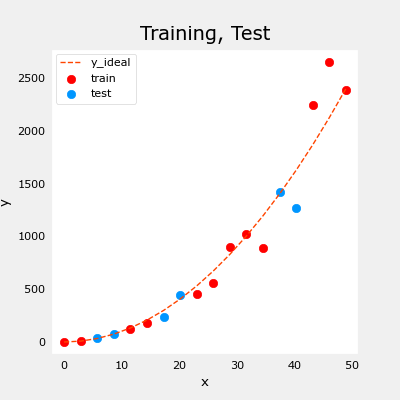

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

In [4]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    mse = np.square(y - yhat)
    m = len(mse)
    return np.sum(mse) / (2*m)
    

In [5]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


In [6]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

In [7]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


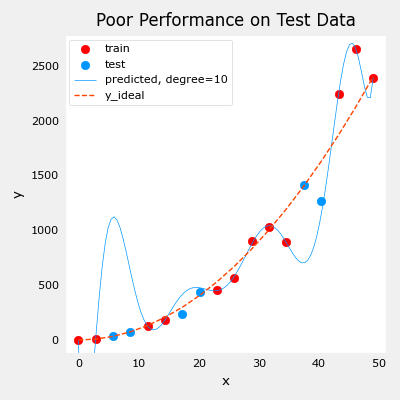

In [8]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

In [9]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


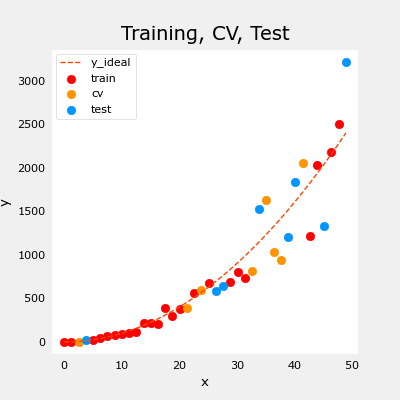

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

In [11]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

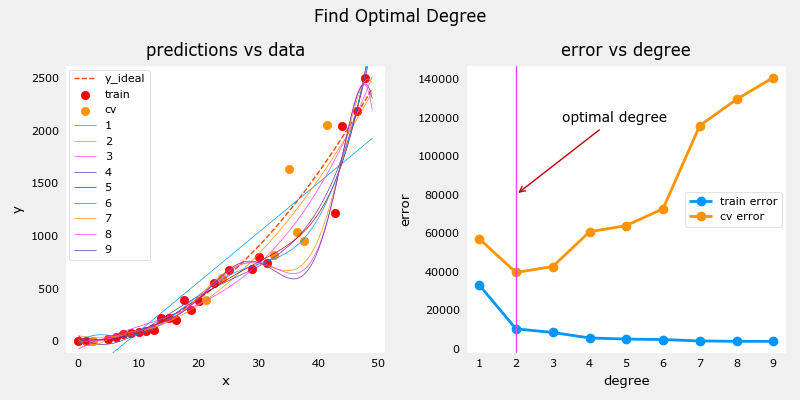

In [12]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

In [13]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

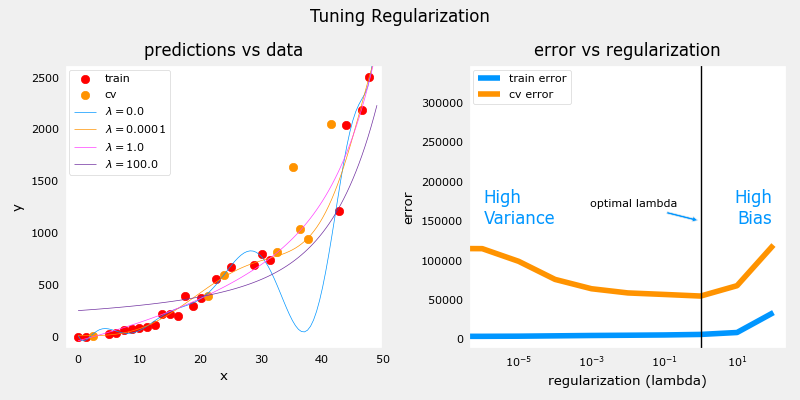

In [14]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

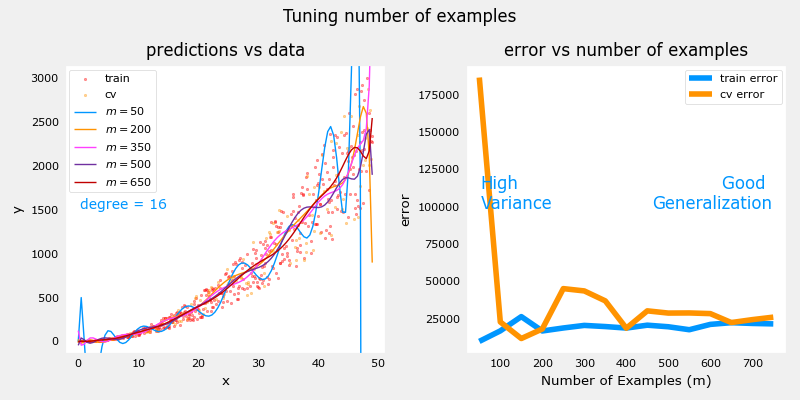

In [15]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

In [16]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs() 

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


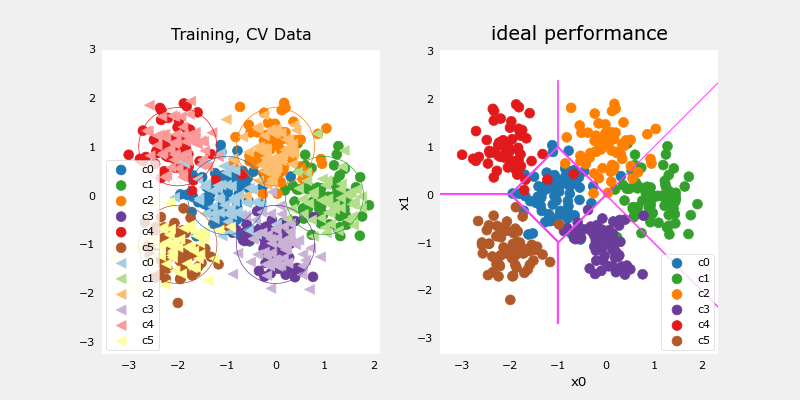

In [17]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

In [18]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    delta = (y != yhat)
    m = len(y)
    return np.sum(delta) / m

In [19]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


In [25]:
# # UNQ_C3
# # GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(40, activation='relu'),
        tf.keras.layers.Dense(6, activation='linear')
    ], name='Complex'
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

# model = Sequential(
#     [
#         ### START CODE HERE ### 
#         tf.keras.layers.Dense(120, activation="relu"),
#         tf.keras.layers.Dense(40, activation="relu"),
#         tf.keras.layers.Dense(6, activation="linear")
#         ### END CODE HERE ### 
#     ], name="Complex"
# )
# model.compile(
#     ### START CODE HERE ### 
#     loss=SparseCategoricalCrossentropy(from_logits=True),
#     optimizer=tf.keras.optimizers.Adam(lr=0.01),
#     ### END CODE HERE ### 
# )

In [27]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0598
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4053
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3103
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2785
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2764
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2830
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2426
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2239
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2225
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2053
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2183
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2068
Epoch 13/1000
13/13 [====

In [28]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 120)               360       
                                                                 
 dense_4 (Dense)             (None, 40)                4840      
                                                                 
 dense_5 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


1082/1082 [==============================] - 1s 708us/step


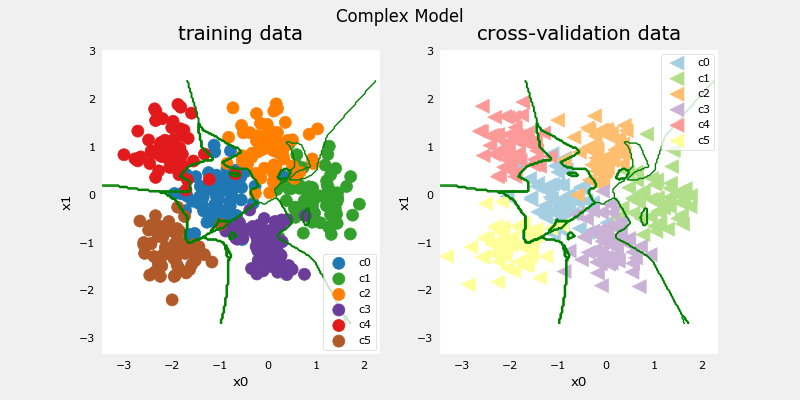

In [29]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [30]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 1ms/step
categorization error, training, complex model: 0.007
categorization error, cv,       complex model: 0.119


In [34]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(6, activation='linear')
    ], name='Simple'
)

model_s.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

In [35]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.7300
Epoch 2/1000
13/13 [==============================] - 0s 1000us/step - loss: 1.4301
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.1985
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9790
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8053
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6680
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5743
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4995
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4464
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4050
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3732
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3516
Epoch 13/1000
13/13 [=

In [36]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 18        
                                                                 
 dense_9 (Dense)             (None, 6)                 42        
                                                                 
Total params: 60 (480.00 Byte)
Trainable params: 60 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
All tests passed!


1082/1082 [==============================] - 1s 598us/step


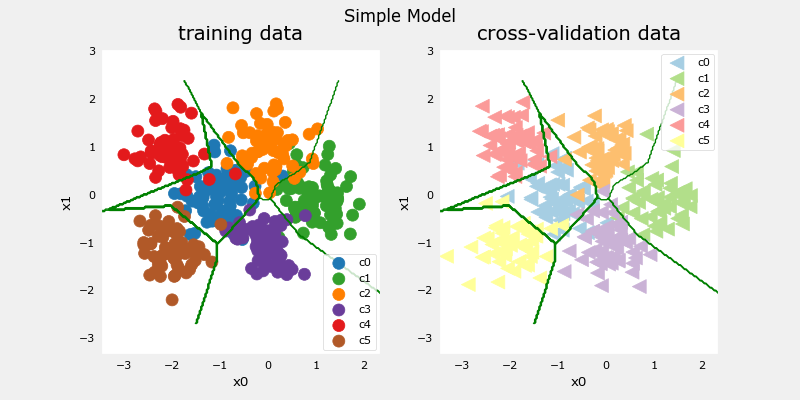

In [37]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

In [38]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 1ms/step
categorization error, training, simple model, 0.070, complex model: 0.007
categorization error, cv,       simple model, 0.066, complex model: 0.119


In [42]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(6, activation='linear')
    ]
)

model_r.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

In [43]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 1s 1ms/step - loss: 4.5018
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6252
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.2749
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.0447
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.9758
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9503
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9343
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8656
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8149
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7760
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7554
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7579
Epoch 13/1000
13/13 [====

In [44]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 120)               360       
                                                                 
 dense_11 (Dense)            (None, 40)                4840      
                                                                 
 dense_12 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5446 (42.55 KB)
Trainable params: 5446 (42.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
ddd
All tests passed!


1082/1082 [==============================] - 1s 697us/step


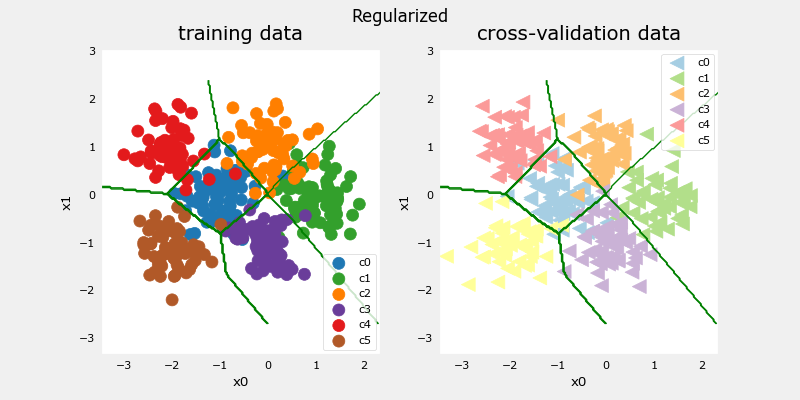

In [45]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

In [46]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )


3/3 [==============================] - 0s 1ms/step
categorization error, training, regularized: 0.058, simple model, 0.070, complex model: 0.007
categorization error, cv,       regularized: 0.062, simple model, 0.066, complex model: 0.119


In [50]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.1314
Epoch 2/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4501
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3245
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2789
Epoch 5/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.2672
Epoch 6/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.2861
Epoch 7/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.2412
Epoch 8/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.2282
Epoch 9/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2322
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2038
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2241
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2107
Epoch 13/10

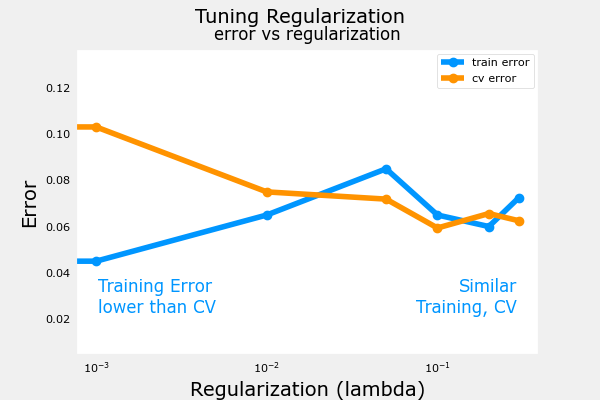

In [48]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

3/3 [==============================] - 0s 2ms/step


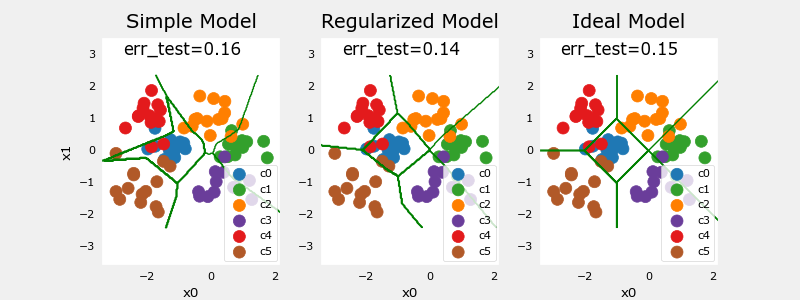

In [49]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)